# Using PCA to Detect Credit Card Fraud

Credit card fraud is a growing concern for financial institutions and individuals alike. While advanced machine learning methods have recently become popularized to help identify possible fraudulent transactions, PCA can also be a quite useful method due to its easy implementation. While it may not turn out to be as accurate as advanced methods, PCA can be used as a stepping stone or baseline to build models off of and compare to. The goal of this project is to develop a PCA-based credit card fraud detection system in order to try and  accurately classify transactions as either legitimate or fraudulent.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Dataset

For this project, I found a dataset on Kaggle with 1,000,000 theoretical credit card transactions. Each transaction has the following features:<br>
    -<strong>distance_from_home</strong>: how far the transaction took place from the cardholder's home<br>
    -<strong>distance_from_last_transaction</strong>: how far the transaction took place from the card's previous transaction<br>
    -<strong>ratio_to_median_purchase_price</strong>: transaction amount divided by the card's median transaction amount<br>
    -<strong>repeat_retailer</strong>: if the card has been used at that retailer before or not<br>
    -<strong>used_chip</strong>: if the card's chip was used in the transaction or not<br>
    -<strong>used_pin_number</strong>: if the card's pin number was used in the transaction or not<br>
    -<strong>online_order</strong>: if the transaction was for an online order or not<br>
    -<strong>fraud</strong>: if the transaction was fraudulent or not

In [46]:
df = pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [48]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

### Data Scaling

Utilized Sklearn's StandardScaler to scale the numeric features.

In [49]:
df_scaled = df.copy(deep=False)

cols_to_scale = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

scaler = StandardScaler()
scaler.fit(df_scaled[cols_to_scale])
df_scaled[cols_to_scale] = scaler.transform(df_scaled[cols_to_scale])

In [50]:
df_scaled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,1.0,1.0,0.0,0.0,0.0
999996,-0.103318,-0.091035,0.340808,1.0,1.0,0.0,0.0,0.0
999997,-0.362650,-0.137903,-0.573694,1.0,1.0,0.0,1.0,0.0
999998,-0.342098,-0.185523,-0.481628,1.0,0.0,0.0,1.0,0.0


### Data Splitting

Split the data into the feature and target variables.

In [51]:
X = df_scaled.drop('fraud', axis=1)
y = df_scaled['fraud']

### PCA Explained Variance Ratio

In order to decide the number of principal components I wanted to use, I took a look at the explained variance ratio of all the principal components. From this, I decided to choose three principal components.

In [52]:
pca = PCA(n_components=7)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.27480867 0.27417948 0.27361244 0.06236582 0.06228307 0.02795915
 0.02479137]


### PCA Implementation and Fraud Detection

Decompose the original features into 3 PCs and then reconstruct the original features based on the 3 PCs.

In [53]:
pca = PCA(n_components=3)
X_pca = pd.DataFrame(pca.fit_transform(X), index = X.index)
X_restored = pd.DataFrame(pca.inverse_transform(X_pca), index = X_pca.index)

Define a function to calculate the difference between each transaction's original features vs. the reconstructed features.

In [54]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.round(np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1), 5)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

Apply the function to the data. Create a new dataframe with each transaction's score and if it is a fraudulant transaction or not.

In [55]:
reconstruction_errors = get_anomaly_scores(X, X_restored)
check_df = pd.concat([reconstruction_errors, y], axis = 1).reset_index(drop=True)
check_df.columns = ['score', 'fraud']
check_df.sort_values('score')

,score,fraud
432691,0.18906,0.0
253435,0.25492,1.0
834905,0.25493,1.0
528776,0.25494,1.0
390707,0.25494,1.0
...,...,...
33705,13.61988,0.0
780353,13.81693,0.0
266995,19.98953,0.0
847723,46.15666,0.0


I found that a score threshold of .25847 is optimal for detecting the most fraudulent transactions without misclassifying too many non-fraudulent transactions. All transactions with scores less than .25847 are predicted to be fraudulent. The number of non-fraudulent transactions quickly increases after .25847, so while using a threshold beyond this would capture more fraudulent transactions, it would diminish the accuracy of the model.

In [56]:
check_df[check_df['score'] < .25847].groupby('fraud').count()

,score
fraud,
0.0,1
1.0,13777


Text(0, 0.5, 'Probability Density')

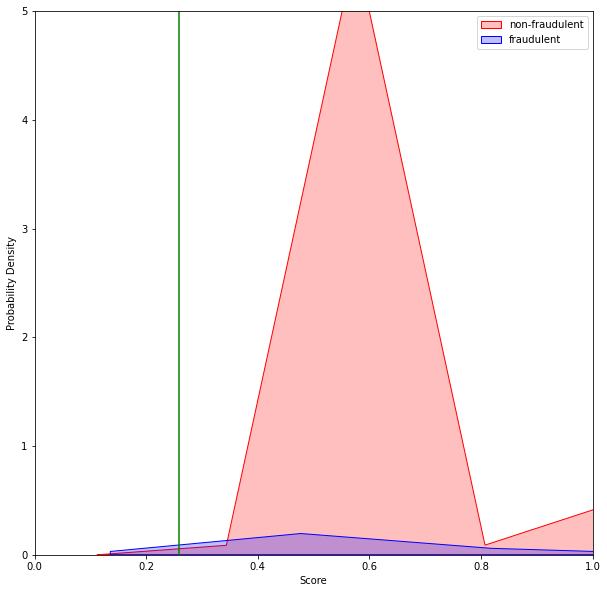

In [57]:
fig, ax = plt.subplots(figsize=(10,10))

sns.kdeplot(check_df.loc[(check_df['fraud']==0),
            'score'], color='r', shade=True, label='non-fraudulent', ax = ax)
  
sns.kdeplot(check_df.loc[(check_df['fraud']==1), 
            'score'], color='b', shade=True, label='fraudulent', ax = ax)

plt.xlim(0, 1)
plt.ylim(0, 5)
plt.axvline(.25847, color = 'g')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Probability Density')

In [58]:
check_df['pred'] = np.where(check_df['score'] < .25847, 1.0, 0.0)
check_df.sort_values('score')

,score,fraud,pred
432691,0.18906,0.0,1.0
253435,0.25492,1.0,1.0
834905,0.25493,1.0,1.0
528776,0.25494,1.0,1.0
390707,0.25494,1.0,1.0
...,...,...,...
33705,13.61988,0.0,0.0
780353,13.81693,0.0,0.0
266995,19.98953,0.0,0.0
847723,46.15666,0.0,0.0


Show the classification report (precision, recall, and f1-score) for the predictions and show the confusion matrix

In [59]:
print(classification_report(check_df['fraud'], check_df['pred']))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    912597
         1.0       1.00      0.16      0.27     87403

    accuracy                           0.93   1000000
   macro avg       0.96      0.58      0.62   1000000
weighted avg       0.93      0.93      0.90   1000000



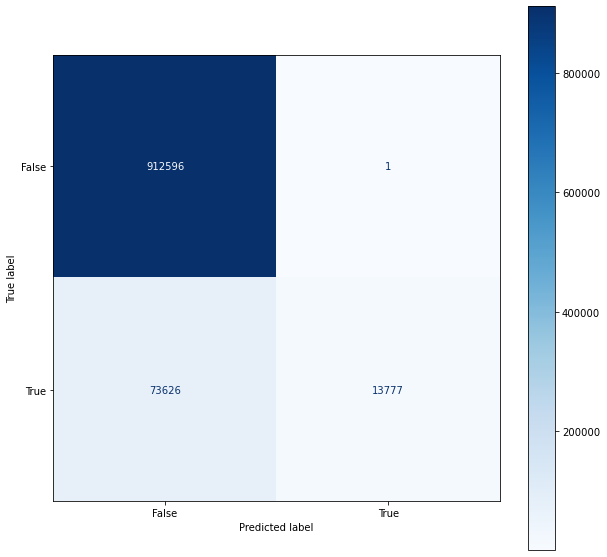

In [60]:
cm = confusion_matrix(check_df['fraud'], check_df['pred'])
cmp = ConfusionMatrixDisplay(cm, display_labels=[False, True])
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

While utilizing PCA only correctly classifies 13,777 fraudulent transactions out of 87,403 (15.76%), it only misclassifies 1 non-fraudulent transaction. While credit card companies would want to correctly identify as many fraudulent transactions as possible, it is also equally important to them not mis-classify too many non-fraudulent transactions.

### PCA Implementation with train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [71]:
pca = PCA(n_components=3)
X_pca_train = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index)
X_restored_train = pd.DataFrame(pca.inverse_transform(X_pca_train), index = X_pca_train.index)
pca.explained_variance_ratio_

array([0.30289926, 0.2749582 , 0.256051  ])

In [72]:
reconstruction_errors = get_anomaly_scores(X_train, X_restored_train)
check_df_train = pd.concat([reconstruction_errors, y_train], axis = 1).reset_index(drop=True)
check_df_train.columns = ['score', 'fraud']
check_df_train

,score,fraud
0,0.27268,0.0
1,0.87506,0.0
2,0.27209,0.0
3,0.99614,0.0
4,0.27431,1.0
...,...,...
499995,1.79619,0.0
499996,0.27216,0.0
499997,0.57526,0.0
499998,0.56809,0.0


In [73]:
check_df_train[check_df_train['score'] < .25847].groupby('fraud').count()

,score
fraud,
0.0,1
1.0,6159


In [74]:
X_pca_test = pd.DataFrame(pca.transform(X_test), index = X_test.index)
X_restored_test = pd.DataFrame(pca.inverse_transform(X_pca_test), index = X_pca_test.index)

In [75]:
reconstruction_errors = get_anomaly_scores(X_test, X_restored_test)
check_df_test = pd.concat([reconstruction_errors, y_test], axis = 1).reset_index(drop=True)
check_df_test.columns = ['score', 'fraud']
check_df_test

,score,fraud
0,1.29541,0.0
1,0.57269,0.0
2,0.26927,0.0
3,0.87480,0.0
4,0.87609,0.0
...,...,...
499995,1.29902,0.0
499996,0.27422,1.0
499997,0.56626,1.0
499998,0.27142,0.0


In [76]:
check_df_test['pred'] = np.where(check_df_test['score'] < .25847, 1.0, 0.0)
check_df_test

,score,fraud,pred
0,1.29541,0.0,0.0
1,0.57269,0.0,0.0
2,0.26927,0.0,0.0
3,0.87480,0.0,0.0
4,0.87609,0.0,0.0
...,...,...,...
499995,1.29902,0.0,0.0
499996,0.27422,1.0,0.0
499997,0.56626,1.0,0.0
499998,0.27142,0.0,0.0


In [77]:
print(classification_report(check_df_test['fraud'], check_df_test['pred']))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    456546
         1.0       1.00      0.14      0.24     43454

    accuracy                           0.93    500000
   macro avg       0.96      0.57      0.60    500000
weighted avg       0.93      0.93      0.90    500000



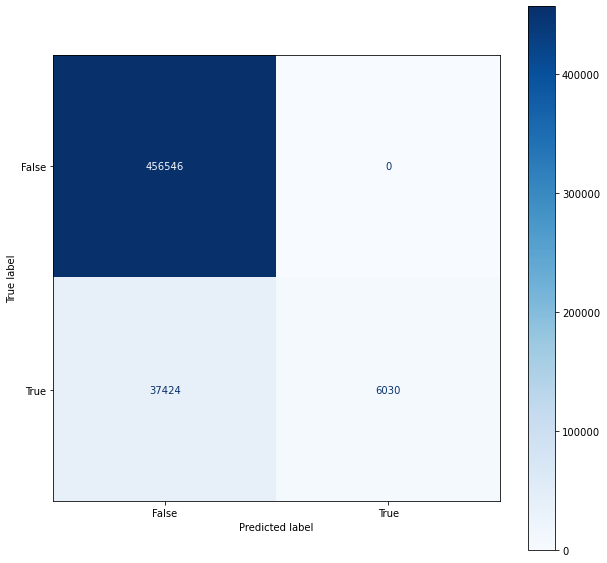

In [78]:
cm_test = confusion_matrix(check_df_test['fraud'], check_df_test['pred'])
cmp_test = ConfusionMatrixDisplay(cm_test, display_labels=[False, True])
fig, ax = plt.subplots(figsize=(10,10))
cmp_test.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

### References

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download<br>
https://towardsdatascience.com/detect-anomalies-in-telemetry-data-using-principal-component-analysis-98d6dc4bf843<br>
https://www.atmosera.com/blog/pca-based-anomaly-detection/